# Aula 5 - Análise de Malhas

Jupyter Notebook desenvolvido por [Gustavo S.S.](https://github.com/GSimas)

**A análise de malhas também é
conhecida como análise de laço ou
método malha corrente.**

Lembre-se de que um
laço é um caminho fechado que não passa mais de uma vez pelo mesmo nó.
Uma malha é um laço que não contém qualquer outro laço dentro de si.

O circuito da Figura 3.15a tem dois ramos
que se cruzam, porém ele pode ser redesenhado como na Figura 3.15b.
o circuito da Figura 3.15a também é planar; entretanto, o circuito da
Figura 3.16 é não planar, pois não há nenhuma maneira de redesenhá-lo sem
que haja algum cruzamento entre ramos.

![](http://i.imgur.com/3Gu3UOb.png)
![](http://i.imgur.com/V5yAmq0.png)

**Malha é um laço que não contém nenhum outro laço em seu interior.**

![](http://i.imgur.com/eihmMJc.png)

O sentido da corrente de malha
é arbitrário (sentido horário ou
anti-horário) e não afeta a validade
da solução.

Etapas na determinação de correntes de malha:

1. Atribua correntes de malha i1, i2, ..., in a n malhas.
2. Aplique a LKT a cada uma das n malhas. Use a lei de Ohm para expressar as tensões em termos de correntes de malha.
3. Resolva as n equações simultâneas resultantes para obter as correntes de malha.

Resolução para a figura 3.17. 

Malha 1:

\begin{align}
-V_1 + R_1i_1 + R_3(i_1 - i_2) = 0
\\
\\(R_1 + R_3)i_1 - R_3i_2 = V_1
\end{align}

Malha 2:

\begin{align}
R_2i_2 + V_2 + R_3(i_2 - i_1) = 0
\\
\\-R_3i_1 + (R_2 + R_3)i_2 = -V_2
\end{align}

Reorganizando as equações, temos:

\begin{align}
\begin{bmatrix}
R_1 + R_3   & -R_3 \\
-R_3        & R_2 + R_3
\end{bmatrix}
\begin{bmatrix}
i_1 \\
i_2
\end{bmatrix}
=
\begin{bmatrix}
V_1 \\
-V_2
\end{bmatrix}
\end{align}

Note que **as correntes de ramo são diferentes das de malha, a menos que a
malha esteja isolada**. Para distinguir entre os dois tipos de correntes, usaremos
i para indicar correntes de malha e I para indicar correntes de ramo. Os elementos
de corrente I1, I2 e I3 são somas algébricas das correntes de malha. Fica
evidente da Figura 3.17 que:

\begin{align}
I_1 = i_1
\\
I_2 = i_2
\\
I_3 = i_1 - i_2
\end{align}

**Exemplo 3.5**

Para o circuito da Figura 3.18, determine as correntes de ramo I1, I2 e I3 usando a análise
de malhas.

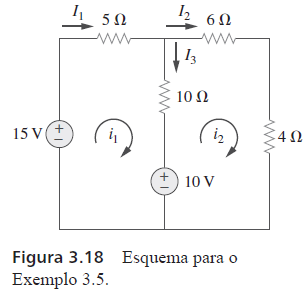

In [1]:
print("Exemplo 3.5")
import numpy as np

V1 = 15
V2 = 10

#Malha 1:
#-V1 + 5i1 + 10(i1 - i2) + V2 = 0
    #15i1 - 10i2 = 5
    #3i1 - 2i2 = 1
    
#Malha 2:
#-V2 + 10(i2 - i1) + 6i2 + 4i2 = 0
    #20i2 - 10i1 = 10
    #2i2 - i1 = 1
    
coef = np.matrix('3 -2;2 -1')
res = np.matrix('1;1')
I = np.linalg.inv(coef)*res
print("Corrente I1:",I[0],"A")
print("Corrente I2:",I[1],"A")
print("Corrente I3:",I[0]-I[1],"A") #aproximadamente = 0

Exemplo 3.5
Corrente I1: [[ 1.]] A
Corrente I2: [[ 1.]] A
Corrente I3: [[ -2.22044605e-16]] A


**Problema Prático 3.5**

Calcule as correntes de malha i1 e i2 no circuito da Figura 3.19.

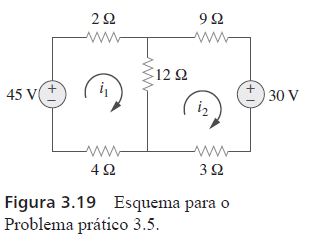

In [3]:
print("Problema Prático 3.5")
V1 = 45
V2 = 30

#Malha 1:
#2i1 + 12(i1 - i2) + 4i1 = V1
    #18i1 - 12i2 = 45
    #6i1 - 4i2 = 15

#Malha 2:
#3i2 + 12(i2 - i1) + 9i2 = -V2
    #-12i1 + 24i2 = 30
    #-2i1 + 4i2 = -5

coef = np.matrix("6 -4;-2 4")
res = np.matrix("15;-5")
I = np.linalg.inv(coef)*res
print("Corrente i1:",I[0],"A")
print("Corrente i2:",I[1],"A")

Problema Prático 3.5
Corrente i1: [[ 2.5]] A
Corrente i2: [[ 0.]] A


**Exemplo 3.6**

Use a análise de malhas para encontrar a corrente Io no circuito da Figura 3.20.

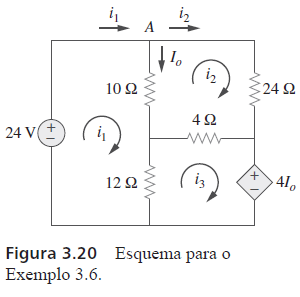

In [4]:
print("Exemplo 3.6")
V1 = 24
CCVS = 4#io

#Malha 1:
#10(i1 - i2) + 12(i1 - i3) = V1
    #22i1 - 10i2 - 12i3 = 24
    #11i1 - 5i2 - 6i3 = 12

#Malha 2:
#24i2 + 4(i2 - i3) + 10(i2 - i1) = 0
    #-10i1 + 38i2 - 4i3 = 0
    #-5i1 + 19i2 - 2i3 = 0

#Malha 3:
#12(i3 - i1) + 4(i3 - i2) + 4i0 = 0
    #i0 = i1 - i2
    #-12i1 - 4i2 + 16i3 + 4(i1 - i2) = 0
    #-8i1 - 8i2 + 16i3 = 0
    #-i1 - i2 + 2i3 = 0

coef = np.matrix("11 -5 -6;-5 19 -2;-1 -1 2")
res = np.matrix("12;0;0")
I = np.linalg.inv(coef)*res
print("Corrente i0:",I[0]-I[1],"A")

Exemplo 3.6
Corrente i0: [[ 1.5]] A


**Problema Prático 3.6**

Usando a análise de malhas, determine Io no circuito da Figura 3.21.

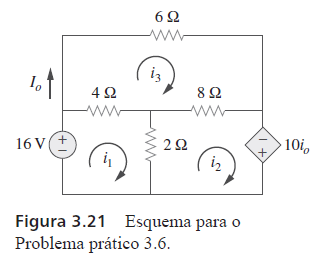

In [7]:
print("Problema Prático 3.6")
V1 = 16
CCVS = 10#io

#Malha 1:
#-V1 + 4(i1 - i3) + 2(i1 - i2) = 0
    #6i1 - 2i2 - 4i3 = 16
    #3i1 - i2 - 2i3 = 8

#Malha 2:
#2(i2 - i1) + 8(i2 - i3) - CCVS = 0
    #-2i1 + 10i2 - 8i3 = 10i0
    #i0 = i3
    #-i1 + 5i2 - 9i3 = 0

#Malha 3:
#6i3 + 8(i3 - i2) + 4(i3 - i1) = 0
    #-4i1 - 8i2 + 18i3 = 0
    #-2i1 - 4i2 + 9i3 = 0

coef = np.matrix("3 -1 -2;-1 5 -9;-2 -4 9")
res = np.matrix("8;0;0")
I = np.linalg.inv(coef)*res
print("Corrente i0:",I[2],"A")

Problema Prático 3.6
Corrente i0: [[-4.]] A


## Análise de malhas com fontes de corrente

**Caso 1**: Quando existe uma fonte de corrente apenas em uma malha:
considere, por exemplo, o circuito da Figura 3.22. Fazemos i2 = –5 A e escrevemos
uma equação de malha para a outra malha da maneira usual, isto é:

\begin{align}
-10 + 4i_1 + 6(i_1 - i_2) = 0
\\
\\i_1 = -2 A
\end{align}

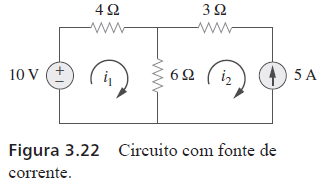

**Caso 2**: Quando uma fonte de corrente existe entre duas malhas: considere
o circuito da Figura 3.23a, por exemplo. Criamos uma supermalha, excluindo
a fonte de corrente e quaisquer elementos a ela associados em série,
como mostrado na Figura 3.23b. Logo:

**Uma supermalha é resultante quando duas malhas possuem uma fonte de
corrente (dependente ou independente) em comum.**

![](http://i.imgur.com/zLuuvRX.png)

uma supermalha deve realizar a LKT como qualquer outra malha. Assim, aplicando
a LKT à supermalha da Figura 3.23b, temos:

\begin{align}
-20 + 6i_1 + 10i_2 + 4i+2 = 0
\\
6i_1 + 14i_2 = 20
\\
\\Assim:
\\i_1 = -3,2 A
\\i_2 = 2,8 A
\end{align}

**Exemplo 3.7**

Para o circuito da Figura 3.24, determine i1 a i4 usando a análise de malhas.

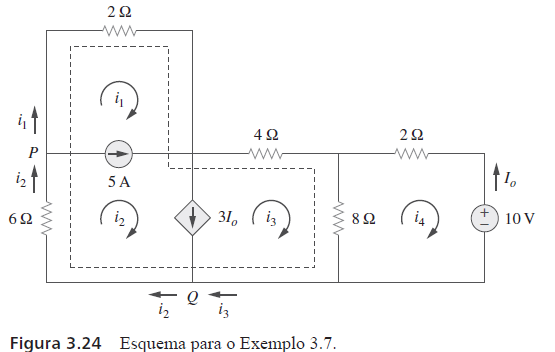

In [8]:
print("Exemplo 3.7")
V1 = 10
C1 = 5
CCCS = 3#io

#Supermalha:
#2i1 + 4i3 + 8(i3 - i4) + 6i2 = 0
    #2i1 + 6i2 + 12i3 - 8i4 = 0
    #i4 = -i0
    #i1 + 3i2 + 6i3 + 4i0 = 0
    #i2 - i3 = 3i0 => i3 = i2 - 3i0
    #i2 - i1 = 5 => i1 = i2 - 5
    #i2 - 5 + 3i2 + 6(i2 - 3i0) + 4i0 = 0
        #10i2 - 14i0 = 5

#Malha 4:
#V1 + 8(i4 - i3) + 2i4 = 0
    #-8i3 + 10i4 = -10
    #-4i3 - 5i0 = -5
    #-4(i2 - 3i0) - 5i0 = -5
        #-4i2 + 7i0 = -5

coef = np.matrix("10 -14; -4 7")
res = np.matrix("5;-5")
I = np.linalg.inv(coef)*res
i1 = I[0] - 5
i4 = -I[1]
print("Corrente i1:",i1,"A")
print("Corrente i4:",i4,"A")

Exemplo 3.7
Corrente i1: [[-7.5]] A
Corrente i4: [[ 2.14285714]] A


**Problema Prático 3.7**

Use a análise de malhas para determinar i1, i2 e i3 na Figura 3.25.

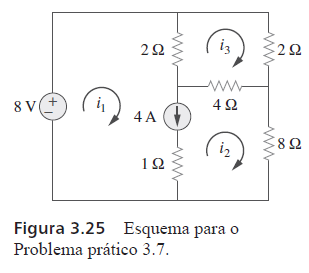

In [9]:
print("Problema Prático 3.7")
V1 = 8
C1 = 4

#Supermalha (Malha 1 e Malha 2):
#2(i1 - i3) + 4(i2 - i3) + 8i2 = 8
    #2i1 + 12i2 - 6i3 = 8
    #i1 + 6i2 - 3i3 = 4
    #i1 - i2 = 4 => i2 = i1 - 4
    #i1 + 6(i1 - 4) - 3i3 = 4
        #7i1 - 3i3 = 28


#2i3 + 4(i3 - i2) + 2(i3 - i1) = 0
    #-2i1 - 4i2 + 8i3 = 0
    #-i1 - 2i2 + 4i3 = 0
        #-i1 - 2(i1 - 4) + 4i3 = 0
        #-3i1 + 4i3 = -8

coef = np.matrix("7 -3;-3 4")
res = np.matrix("28;-8")
I = np.linalg.inv(coef)*res
i2 = I[0] - 4
print("Corrente i1:",I[0],"A")
print("Corrente i2:",i2,"A")
print("Corrente i3:",I[1],"A")

Problema Prático 3.7
Corrente i1: [[ 4.63157895]] A
Corrente i2: [[ 0.63157895]] A
Corrente i3: [[ 1.47368421]] A
